In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import shutil,time,os
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from tqdm import tqdm
# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
# !pip install num2words
from num2words import num2words
# !pip install pyspellchecker
# import spellchecker 
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Others
import json
# import gensim
from sklearn.decomposition import TruncatedSVD

Load Data

In [10]:
input_data=pd.read_csv("./ecommerceDataset.csv",names=["Label","describtion"])
input_data.head(2)

,Label,describtion
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."


In [11]:
input_data.isna().sum()

Label          0
describtion    1
dtype: int64

In [12]:
input_data.shape

(50425, 2)

In [13]:
input_data.dropna(inplace=True)

In [14]:
input_data.isna().sum()

Label          0
describtion    0
dtype: int64

In [15]:
input_data.shape

(50424, 2)

Remove Duplicate

In [16]:
input_data.drop_duplicates(subset="describtion",inplace=True)

In [17]:
input_data.shape

(27802, 2)

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encode=LabelEncoder()
input_data["Label"]=label_encode.fit_transform(input_data["Label"])

In [19]:
input_data["Label"].value_counts()

Label
3    10564
0     6256
1     5674
2     5308
Name: count, dtype: int64

In [20]:
x,y=input_data.drop("Label",axis=1),input_data["Label"]
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=40,stratify=y)
X_val,X_test,Y_val,Y_test=train_test_split(X_test,Y_test,test_size=0.50,random_state=40,stratify=Y_test)

Model Training with sklearn and NLTK

Count Vectorizer / Bag of Words

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
clf=Pipeline([
            ("vectorizer_bow",CountVectorizer()),
            ("Multinominal_NB",MultinomialNB())
            ])
clf.fit(X_train.describtion,Y_train)

Pipeline(steps=[('vectorizer_bow', CountVectorizer()),
                ('Multinominal_NB', MultinomialNB())])

Evaluation 

In [35]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
Y_prediction=clf.predict(X_test.describtion)
print(classification_report(Y_test,Y_prediction))
cm=confusion_matrix(Y_test,Y_prediction)
disp=ConfusionMatrixDisplay(cm)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       626
           1       0.96      0.98      0.97       567
           2       0.92      0.93      0.93       531
           3       0.94      0.95      0.94      1057

    accuracy                           0.94      2781
   macro avg       0.95      0.94      0.95      2781
weighted avg       0.95      0.94      0.94      2781



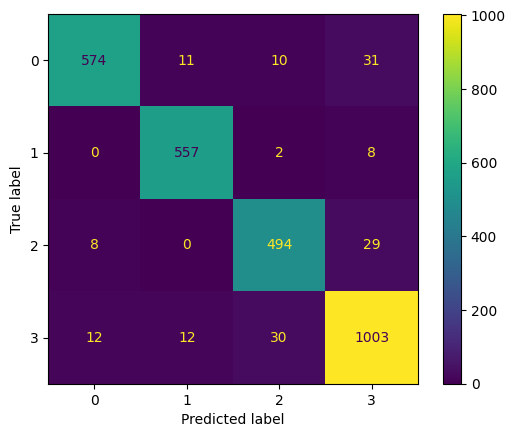

In [34]:
disp.plot()

TfidfVectorizer

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
clf=Pipeline([
            ("vectorizer_bow",TfidfVectorizer()),
            ("Multinominal_NB",MultinomialNB())
            ])
clf.fit(X_train.describtion,Y_train)

Pipeline(steps=[('vectorizer_bow', TfidfVectorizer()),
                ('Multinominal_NB', MultinomialNB())])

In [37]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
Y_prediction=clf.predict(X_test.describtion)
print(classification_report(Y_test,Y_prediction))
cm=confusion_matrix(Y_test,Y_prediction)
disp=ConfusionMatrixDisplay(cm)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       626
           1       0.98      0.92      0.95       567
           2       0.96      0.82      0.89       531
           3       0.85      0.98      0.91      1057

    accuracy                           0.92      2781
   macro avg       0.94      0.90      0.92      2781
weighted avg       0.93      0.92      0.92      2781



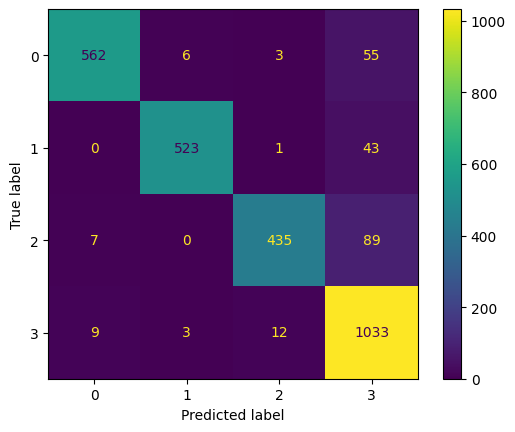

In [38]:
disp.plot()

In [49]:
X_train.shape

(22241, 1)

Unsing Spacy Liabrary

In [50]:
#Pre-Processing
nlp_pipeline=spacy.load("en_core_web_sm")

def preprocess_text(input_text):
    text_to_doc=nlp_pipeline(input_text)
    doc_to_token=[x.lemma_ for x in text_to_doc if not x.is_stop and not x.is_punct]
    return " ".join(doc_to_token)

In [60]:
#preprocess befor Splitting
x,y=input_data.drop("Label",axis=1),input_data["Label"]
X_process=pd.DataFrame()
X_process["describtion"]=x["describtion"].map(preprocess_text)
X_train,X_test,Y_train,Y_test=train_test_split(X_process,y,test_size=0.20,random_state=40,stratify=y)
X_val,X_test,Y_val,Y_test=train_test_split(X_test,Y_test,test_size=0.50,random_state=40,stratify=Y_test)

In [69]:
# X_process

In [67]:
# x

In [68]:
# X_train

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       626
           1       0.96      0.98      0.97       567
           2       0.93      0.94      0.93       531
           3       0.94      0.95      0.94      1057

    accuracy                           0.95      2781
   macro avg       0.95      0.95      0.95      2781
weighted avg       0.95      0.95      0.95      2781



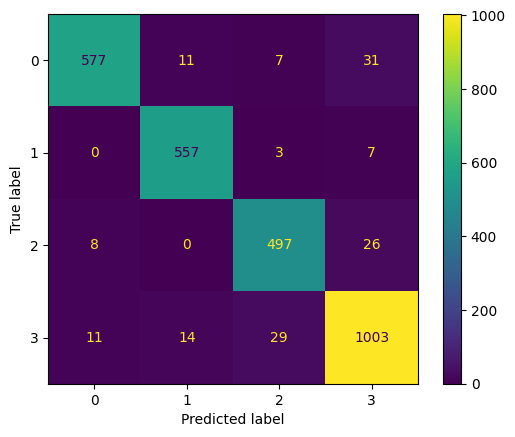

In [72]:
clf=Pipeline([
            ("vectorizer_bow",CountVectorizer(lowercase=True)),
            ("Multinominal_NB",MultinomialNB())
            ])
clf.fit(X_train.describtion,Y_train)
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
Y_prediction=clf.predict(X_test.describtion)
print(classification_report(Y_test,Y_prediction))
cm=confusion_matrix(Y_test,Y_prediction)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       626
           1       0.98      0.94      0.96       567
           2       0.96      0.85      0.90       531
           3       0.87      0.97      0.92      1057

    accuracy                           0.93      2781
   macro avg       0.94      0.92      0.93      2781
weighted avg       0.93      0.93      0.93      2781



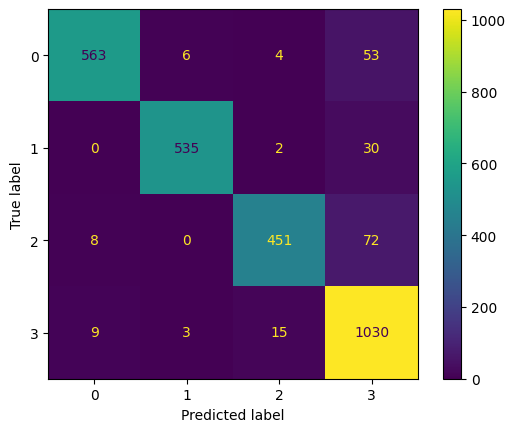

In [71]:
clf=Pipeline([
            ("vectorizer_bow",TfidfVectorizer(lowercase=True)),
            ("Multinominal_NB",MultinomialNB())
            ])
clf.fit(X_train.describtion,Y_train)
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
Y_prediction=clf.predict(X_test.describtion)
print(classification_report(Y_test,Y_prediction))
cm=confusion_matrix(Y_test,Y_prediction)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [73]:
import pickle
with open('Product_Dicription_Classification.pkl', 'wb') as file:
    pickle.dump(clf, file)

Inference Trained Module

In [76]:
with open('Product_Dicription_Classification.pkl', 'rb') as file:
    trained_model=pickle.load(file)

In [87]:
Input_description="""[Native 1080P Outstanding Visual Experience] With a Full HD resolution of 1920 x 1080 and supports 4K, the Agreago GC777 portable projector offers an upgraded brightness of 14000L and a higher contrast ratio of up to 15000:1. Creating your home theater is made simpler by the vibrant effect. It also features diffuse reflection tech and eyes protection light source to prevent tiredness of the eyes.
[Faster 5G WiFi & Bluetooth 5.1 Connection] With its 2.4G/5G dual-band WiFi that comes with this movie projector, you can enjoy a wider coverage and faster transmission. In less than 5 seconds, enjoy a fast connection. Our upgraded Bluetooth projector makes it easy to connect to a variety of Bluetooth speakers, allowing you to enjoy better sound when camping or hosting a party.
[Portability & Wide Compatibility] With HDMI/USB/AV/Audio ports, our WiFi projector is compatible with the iPhone, Android smartphone, Laptop, tablet, TV Stick, external speaker, PS5, USB disk, and more. With just a plug-and-play, let's start the endless entertainment at your garden parties, backyard gatherings, outdoor camping, and more. This outdoor projector has a compact design and comes with a 100" screen, which can easily fit in backpacks for easy portability on the go.
[Hi-Fi Stereo Sound & Noise Reduction] High-quality sound is provided by the built-in speaker, which creates a cinematic ambiance to your home. The advanced low noise cooling system used by this home theater projector ensures the perfect view without any noise concerns. After setting up a sleep timer, you can watch a movie every night before bed.
[300" Max Screen with Zoom Function] Without having to worry about a long throw distance, our 5G WiFi projector offers screen sizes from 40" to 300" and a 100%–50% zoom feature. The focus function and keystone adjustment also help you customize your screen size to fit any space. This mini projector can be mounted on a tripod or the ceiling easily."""

In [89]:
Input_description=""" WALL STREET JOURNAL AND PUBLISHERS WEEKLY BESTSELLER • A patient-proven eating and lifestyle program to balance nutrition, help manage middle age weight “creep,” and reduce uncomfortable symptoms during menopause and perimenopause—including more than 40 delicious recipes and 6 weeks of meal plans—tailored to women in midlife.

Look for The New Menopause, Mary Claire Haver’s comprehensive guide to thriving during menopause and beyond, coming May 2024!

“The validation of common hormonal symptoms and commiseration with weight gain challenges, especially from a physician with similar struggles, is likely a rare and comforting experience for many women.”—Forbes Health

Why is the scale moving in the wrong direction even though I haven’t changed my diet or exercise habits? Time and again, this is the question Dr. Mary Claire Haver’s patients asked. At first, a practicing OB/GYN, she’d dutifully advise what she’d been taught in medical school: eat less and work out more. But that standard advice didn’t solve the problems caused by perimenopause and menopause because back then she—and so many other doctors—hadn’t taken into account the physiological factors affecting women. They tend to store fat, they can have a hard time accessing that stored fat as active fuel, and their hormonal fluctuations in midlife exacerbate the situation.

Then, Dr. Haver found herself in this exact predicament with the added issues of low energy, hot flashes, and brain fog. So she set out to develop a nutrition program that would meet her own and her patients’ needs once and for all. Now, more than 100,000 women have found success in Dr. Haver’s unique plan for losing dangerous belly fat and reducing menopausal symptoms by following her three interconnected strategies:

• Fuel Refocus: Starting in their thirties, women need a specific ratio of healthy fats, lean protein, and quality carbohydrates to optimize their overall health and efficiently burn fat as fuel.
• Intermittent Fasting: 16 hours of fasting with a flexible 8-hour eating window coaxes the body to draw energy from stored fat and decreases inflammation.
• Anti-inflammatory Nutrition: Limit added sugars, processed carbs, chemical additives and preservatives and layer in anti-inflammatory foods like leafy greens, olive oil, berries, nuts, and tomatoes.

With these three principles working together, women can lose the weight they tend to gain in middle age as well as enjoy newfound energy, better sleep, less brain fog, and fewer hot flashes. Featuring forty delicious recipes, six weeks of easy-to-follow meal plans, shopping lists, and success stories of women who have changed their lives on this lifestyle plan, The Galveston Diet—named for Dr. Haver’s hometown—will revolutionize the conversation around health and empowerment during menopause and perimenopause, with health benefits that last a lifetime"""

In [90]:
trained_model.predict([Input_description])

array([0])

<bound method _MetadataRequester.get_metadata_routing of Pipeline(steps=[('vectorizer_bow', CountVectorizer()),
                ('Multinominal_NB', MultinomialNB())])>